## Obesity

Link para Dataset: [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)

Tais conjuntos de dados são públicos e foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima.

In [33]:
import pandas as pd
import numpy as np

### Perguntas:

In [34]:
df_obesity = pd.read_csv('data/obesity_cleaned.csv')
df_obesity.head(5)

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


#### Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [35]:
df_obesity['Obesity (%)'].value_counts()

Obesity (%)
No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: count, Length: 16375, dtype: int64

In [36]:
# Limpeza de Dados
del df_obesity['Unnamed: 0']
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split(" ")[0])
df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan
df_obesity.dropna(inplace=True)

# Convertendo para numérico
df_obesity['Obesity'] = pd.to_numeric(df_obesity['Obesity'])
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))

df_obesity.set_index('Year', inplace=True)

df_obesity.head(5)

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2


In [37]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24066 entries, 1975 to 2016
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Obesity (%)  24066 non-null  object 
 2   Sex          24066 non-null  object 
 3   Obesity      24066 non-null  float64
dtypes: float64(1), object(3)
memory usage: 940.1+ KB


#### Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [38]:
df_obesity[df_obesity.index == 2015].groupby('Sex')[['Obesity']].mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


#### Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [47]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [49]:
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [51]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [52]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

#### Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [42]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015['Obesity'] == df_2015['Obesity'].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [43]:
df_2015[df_2015['Obesity'] == df_2015['Obesity'].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


#### Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [44]:
df_brasil = df_obesity[df_obesity['Country'] == 'Brazil'].copy()

<Axes: xlabel='Year'>

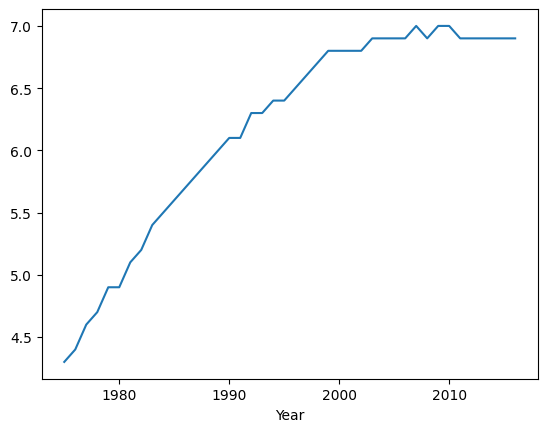

In [45]:
average_maleFemale = df_brasil[df_brasil['Sex'] == 'Female']['Obesity'] - df_brasil[df_brasil['Sex'] == 'Male']['Obesity']
average_maleFemale.plot()

#### Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

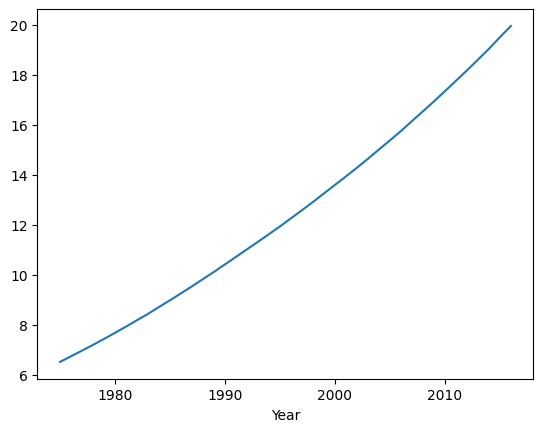

In [46]:
df_both = df_obesity[df_obesity['Sex'] == 'Both sexes'].copy()
df_both = df_both.groupby('Year')['Obesity'].mean()

df_both.plot()